<a href="https://colab.research.google.com/github/SazzadHossain1461/Breast-Cancer-Detection/blob/Breast-Cancer-Detection/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
dataset = pd.read_csv('/content/breast-cancer.csv')
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
dataset.shape

(569, 32)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [74]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [75]:
len(dataset.select_dtypes(include='object').columns)

1

In [76]:
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
len(dataset.select_dtypes(include=['float64', 'int64']).columns)

31

In [78]:
dataset.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [79]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [80]:
dataset.isnull().values.any()

np.False_

In [81]:
dataset.isnull().values.sum()

np.int64(0)

In [82]:
len(dataset.columns[dataset.isnull().any()])

0

In [83]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [84]:
dataset.shape

(569, 32)

In [85]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [86]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [87]:
dataset['diagnosis'].nunique()

2

In [88]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [89]:
dataset.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_M  
0          0.4601                  0.11890         True  
1          0.2750                  0.08902         True  
2          0.3613                  0.08758         True  
3          0.6638                  0.17300         True  
4          0.2364                  0.07678         True  

[5 rows x 32 columns]

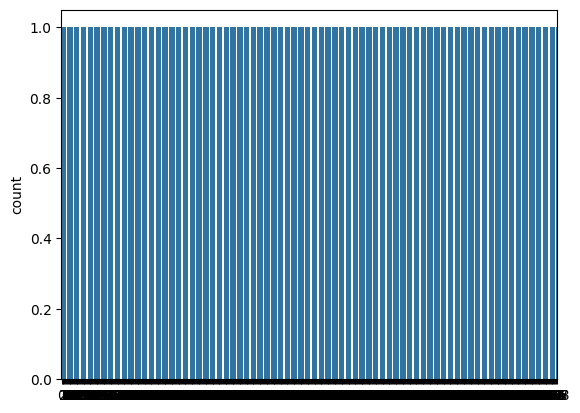

In [90]:
sns.countplot(dataset['diagnosis_M'], label='Count')
plt.show()

In [91]:
(dataset.diagnosis_M == 0).sum()

np.int64(357)

In [92]:
(dataset.diagnosis_M == 1).sum()

np.int64(212)

In [93]:
dataset_2 = dataset.drop(columns='diagnosis_M')

In [94]:
dataset_2.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<Axes: title={'center': 'Correlation with diagnosis_M'}>

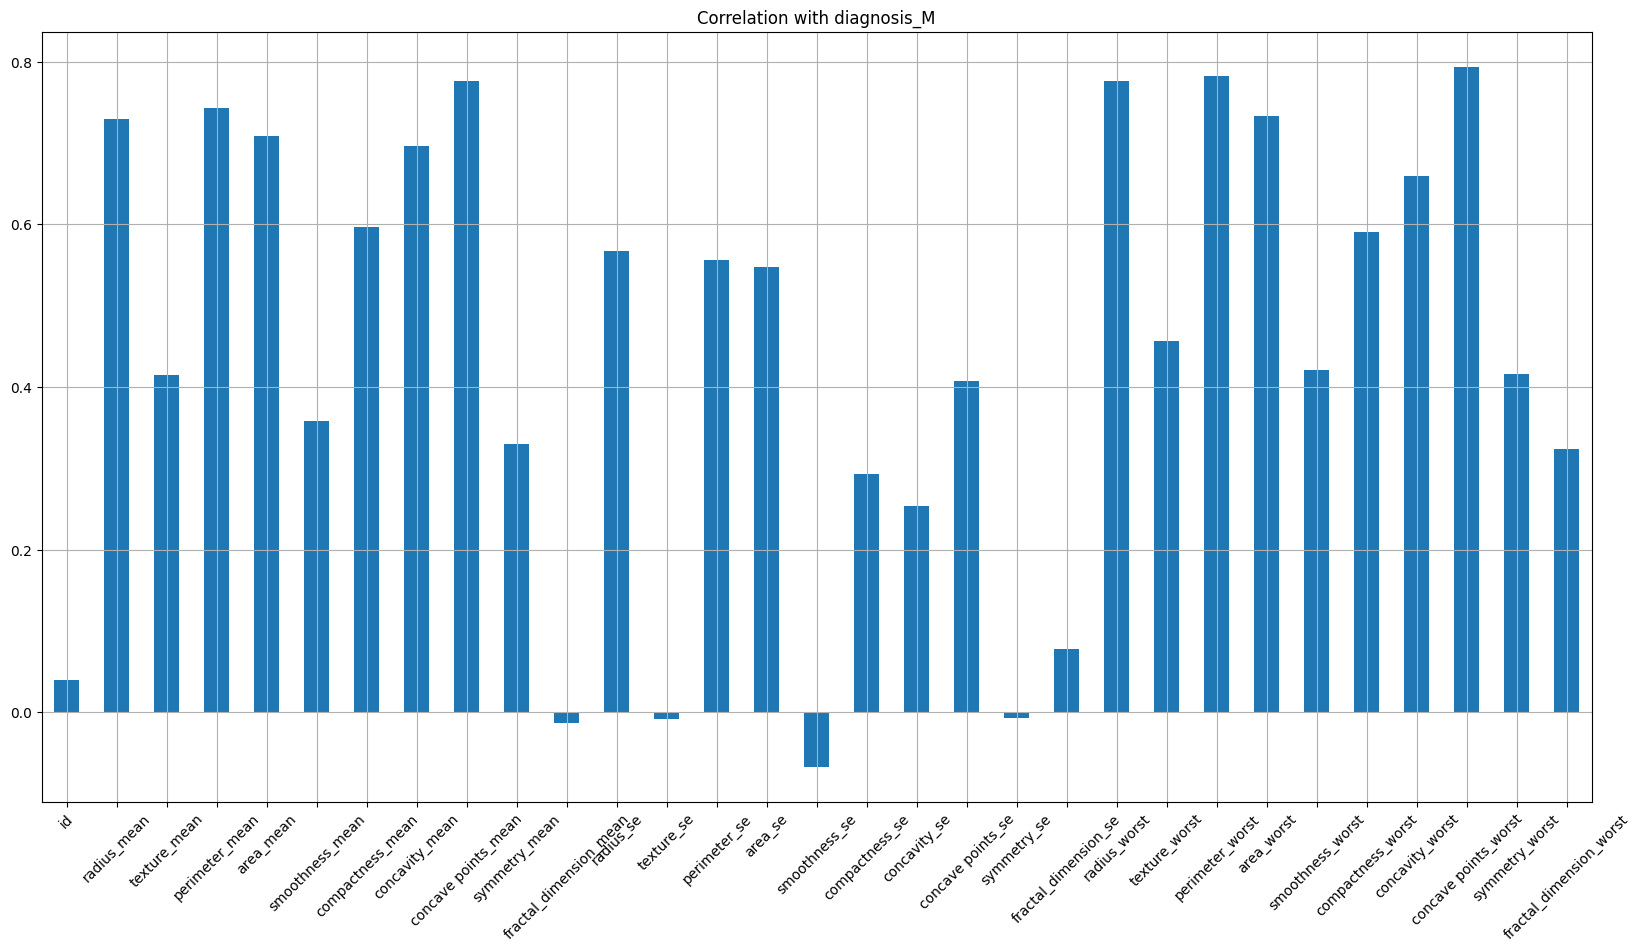

In [95]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize=(20, 10), title='Correlation with diagnosis_M', rot=45, grid=True
)

In [96]:
corr=dataset.corr()

In [97]:
corr

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   
diagnosis_M              0.039769     0.730029      0.415185        0.742636   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
con

<Axes: >

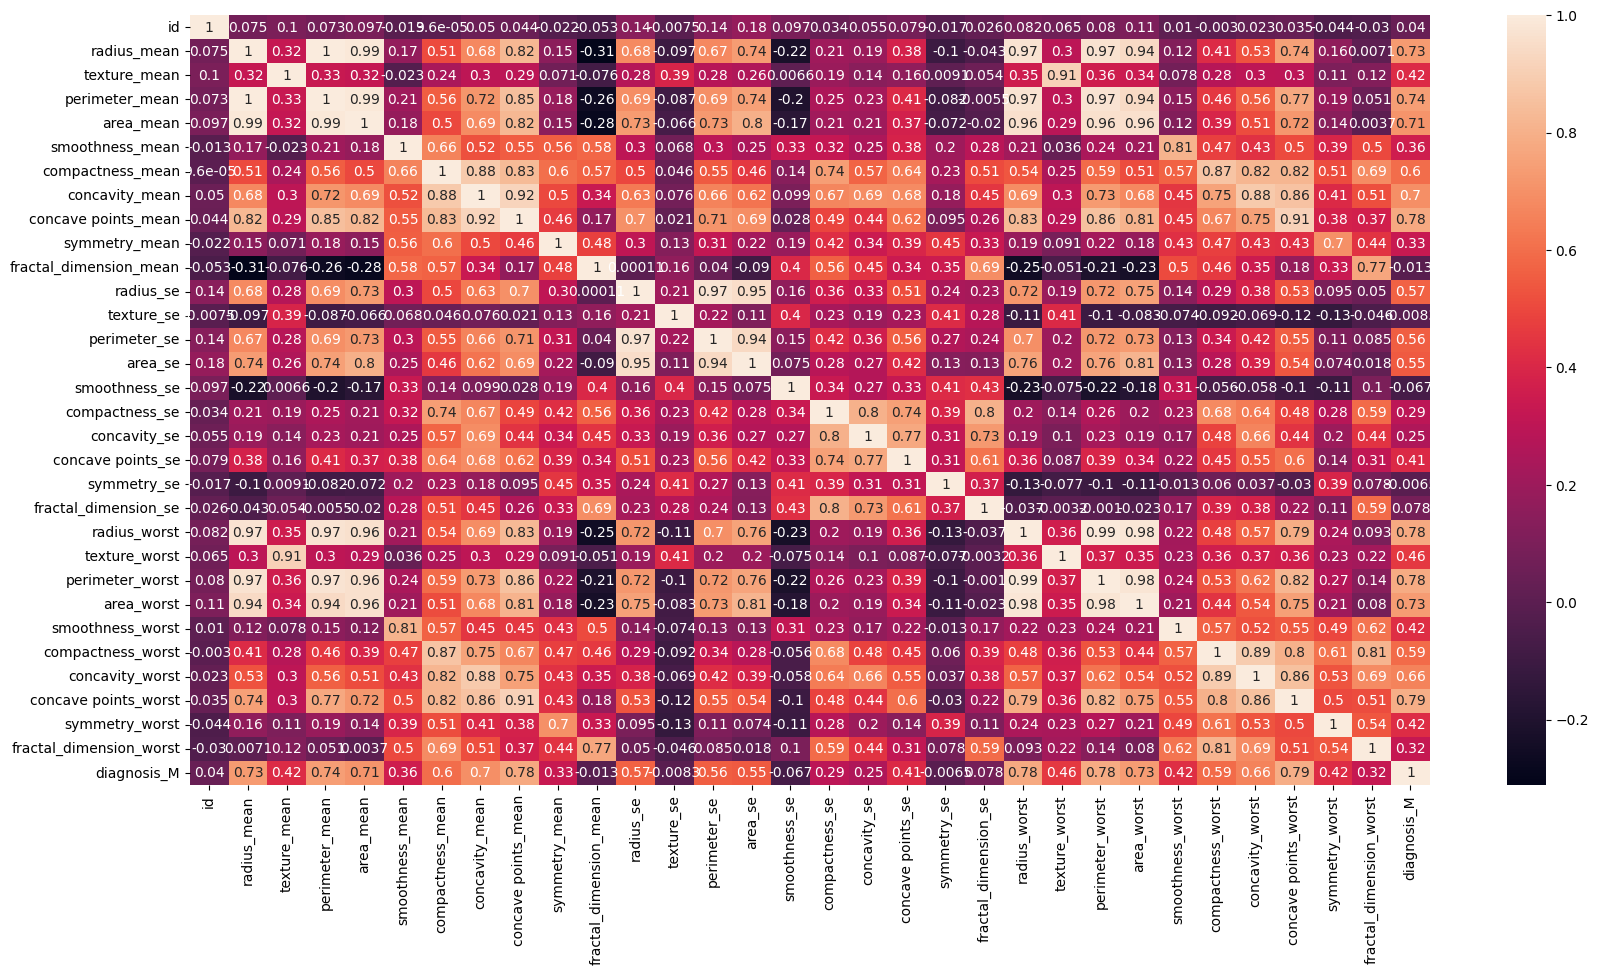

In [98]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

In [99]:
dataset.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_M  
0          0.4601                  0.11890         True  
1          0.2750                  0.08902         True  
2          0.3613                  0.08758         True  
3          0.6638                  0.17300         True  
4          0.2364                  0.07678         True  

[5 rows x 32 columns]

In [100]:
x = dataset.iloc[:, 1:-1].values

In [101]:
x.shape

(569, 30)

In [102]:
y = dataset.iloc[:, -1].values

In [103]:
y.shape

(569,)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [106]:
x_train.shape

(455, 30)

In [107]:
x_test.shape

(114, 30)

In [108]:
y_train.shape

(455,)

In [109]:
y_test.shape

(114,)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc = StandardScaler()

In [112]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [113]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [114]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
classifer_lr= LogisticRegression(random_state=0)

In [117]:
classifer_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [118]:
y_pred = classifer_lr.predict(x_test)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [120]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [121]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [122]:
results

Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.964912  0.957447   0.957447  0.957447

In [123]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 2 45]]


In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
accuracies = cross_val_score(estimator=classifer_lr, X=x_train, y=y_train, cv=10)

In [126]:
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy: 97.81 %
Standard Deviation is 1.98 %


In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
classifer_rm = RandomForestClassifier(random_state=0)
classifer_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [129]:
y_pred = classifer_rm.predict(x_test)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [131]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [132]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [133]:
results = results.append(model_results, ignore_index=True)
results = results.concat(model_results, ignore_index=True)

In [134]:
results

Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.964912  0.957447   0.957447  0.957447
1        Random forest  0.964912  0.958333   0.938776  0.978723

In [135]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  3]
 [ 1 46]]


In [136]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifer_rm, X=x_train, y=y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy: 96.05 %
Standard Deviation is 3.07 %


In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [139]:
parameters

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [140]:
random_search = RandomizedSearchCV(estimator=classifer_lr, param_distributions=parameters,n_iter=10, scoring='roc_auc', n_jobs= -1, cv=10, verbose=3)

In [141]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [142]:
random_search.best_estimator_

LogisticRegression(C=0.75, penalty='l1', random_state=0, solver='liblinear')

In [143]:
random_search.best_score_

np.float64(0.9973123732251521)

In [144]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.75}

In [145]:
from sklearn.linear_model import LogisticRegression
classifer= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                              intercept_scaling=1, l1_ratio=None, max_iter=100,
                              multi_class='auto', n_jobs=None, penalty='l1',
                              random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                              warm_start=False)
classifer.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', penalty='l1', random_state=0,
                   solver='liblinear')

In [146]:
y_pred = classifer.predict(x_test)

In [147]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logistic Regression', acc, f1, prec, rec]],
                            columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)
results

Model  Accuracy  F1 Score  Precision    Recall
0        Logistic Regression  0.964912  0.957447   0.957447  0.957447
1              Random forest  0.964912  0.958333   0.938776  0.978723
2  Final Logistic Regression  0.956140  0.946237   0.956522  0.936170

In [148]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifer, X=x_train, y=y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy: 97.37 %
Standard Deviation is 1.63 %


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [149]:
dataset.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_M  
0          0.4601                  0.11890         True  
1          0.2750                  0.08902         True  
2          0.3613                  0.08758         True  
3          0.6638                  0.17300         True  
4          0.2364                  0.07678         True  

[5 rows x 32 columns]

from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['radius_mean'].plot(kind='hist', bins=20, title='radius_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['texture_mean'].plot(kind='hist', bins=20, title='texture_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['perimeter_mean'].plot(kind='hist', bins=20, title='perimeter_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='radius_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='radius_mean', y='texture_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='texture_mean', y='perimeter_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['radius_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('radius_mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['texture_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('texture_mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['perimeter_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('perimeter_mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['area_mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('area_mean')

from matplotlib import pyplot as plt
_df_12['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['radius_mean'].plot(kind='line', figsize=(8, 4), title='radius_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['texture_mean'].plot(kind='line', figsize=(8, 4), title='texture_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['perimeter_mean'].plot(kind='line', figsize=(8, 4), title='perimeter_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [158]:
dataset.

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [159]:
display(dataset.iloc[0].T)

id                           842302
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                    1001.0
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                   2019.0
smoothness_worst             0.1622
compactness_worst            0.6656
concavity_worst              0.7119
concave points_worst         0.2654
symmetry_worst               0.4601
fractal_dimension_worst      0.1189
diagnosis_M                    True
Name: 0, dtype: object

In [161]:
single_obs = [[17.99,	10.38,	122.80,	1001.0,	0.11840,	0.27760,	0.3001,	0.14710,	0.2419, 0.07871, 1.0950, 0.0953, 8.589, 153.40, 0.006399, 0.04904, 0.05373, 0.01587
, 0.03003, 0.006193, 25.38,	17.33,	184.60,	2019.0,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.11890	]]

In [162]:
single_obs

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.0953,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]

In [163]:
classifer.predict(sc.transform(single_obs))

array([ True])